In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
import os

from importlib import import_module
from packaging import version

n_upgraded_packages=0
def package__require_specific_version(package_name, required_version):
    global n_upgraded_packages
    module = import_module(package_name)
    m_version = module.__version__
    print(f'{package_name:<20} {m_version}')
    upgrade_required = version.parse(m_version) < version.parse(required_version)
    # print(f'"{version}" < "{required_version}"  =>  {upgrade_required}')
    if upgrade_required :
        print(f"- Upgrading {package_name} to version {required_version}")
        os.system(f"pip install {package_name}=={required_version}")
        n_upgraded_packages += 1
    return version

package__require_specific_version('matplotlib', '3.1.0');
package__require_specific_version('statsmodels', '0.9.0'); # should be a dependency of matplotlib 3.2.0
package__require_specific_version('seaborn', '0.10.0');
# pandas

if n_upgraded_packages :
        print(f"!!! KERNEL RESTART REQUIRED to load newly installed packages")

matplotlib           2.1.0
- Upgrading matplotlib to version 3.1.0
statsmodels          0.8.0
- Upgrading statsmodels to version 0.9.0
seaborn              0.8.1
- Upgrading seaborn to version 0.10.0
!!! KERNEL RESTART REQUIRED to load newly installed packages


In [3]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [4]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

## Explanatory Polishing

Through the last few workbooks, you've performed an exploration of a dataset relating the price of diamonds to their four 'C' attributes: carat, cut, color, and clarity. During that exploration, you found that the primary driver of price was carat weight, where the log of price was approximately linearly related to the cube root of carat weight, analogous to the diamond's length, width, or depth. The price was then modified by the diamond's cut, color, and clarity grades.

In this workbook, you'll polish two plots from the earlier exploration so that they can be presented to others in an understandable form.

The first plot to polish depicts the base relationship between price and carat. Make additions and revisions to the code below to refine the given plot.

In [5]:
# https://s3-us-west-2.amazonaws.com/gae-supplemental-media/lesson-6-notespdf/Lesson-6-Notes.pdf
# (also added to my github project for this course)
# See the middle of page 10 for Fuller explanation of the use of cube root of carat weight
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

array([ 0.35407559,  0.71909036,  1.00299073,  1.53023429,  2.01692065])

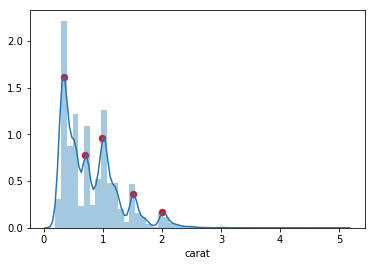

In [6]:
from scipy.signal import argrelextrema
chart = sb.distplot(diamonds['carat']);
diamonds.head(2).to_dict()
n_points=60
x_values = chart.get_lines()[0].get_data()[0] # [:n_points]
y_values = chart.get_lines()[0].get_data()[1] # [:n_points]
# carat_distplot_points.head()
# chart.get_lines()
# list(carat_distplot_points['x'])
peak_indexes = argrelextrema(y_values, np.greater, order=3)[0]
x_peaks = x_values[ peak_indexes ]
y_peaks = y_values[ peak_indexes ]
keep = y_peaks > 1e-02
x_keep = x_peaks [ keep ]
y_keep = y_peaks [ keep ]
plt.scatter(x_keep-.015,y_keep,linewidth=0.3, s=50, c='r');
x_keep

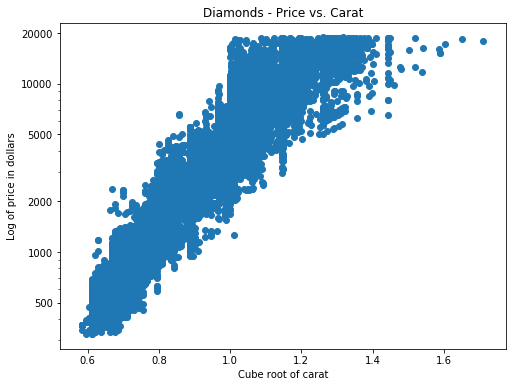

In [7]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])

ax = plt.scatter(data = diamonds, x = 'cr_carat', y = 'price')

plt.title("Diamonds - Price vs. Carat")
plt.xlabel('Cube root of carat')
plt.ylabel('Log of price in dollars')
plt.yscale('log')
# min(diamonds['price']) # 326
# yticks = [300, 1000, 3000, 10000, 30000]
# Suggestion: 1-2-5-10 sequence
yticks = [500, 1000, 2000, 5000, 10000, 20000]
plt.yticks(yticks, yticks);
# plt.ylim(min(yticks)-50, max(yticks));  # unnecessary, plt.yticks(...) is sufficient 

# No perceptable difference at this 0.6 to 1.6 and the suggested xticks are 
if False :
    from cuberootscale import CubeRootScale
    plt.xscale('cuberoot')
    xticks = x_keep
    plt.xticks(xticks, xticks);

Price vs. Carat Polishing comment 1: Use the following list to make sure you've checked the major points of revision in this plot.
- <span style="color:white">Does the plot has an informative title?</span>
- <span style="color:white">Are the axis labels informative?</span>
- <span style="color:white">Are the tick values interpretable?</span>
- <span style="color:white">Do we need to worry about any of the plot aesthetics?</span>

Price vs. Carat Polishing comment 2: Here are some specific comments on the polishing of the plot.

- <span style="color:white">The original plot's vertical axis only has two tick marks, and they're in scientific notation. Not only is it not clear that the data is on a power scale, it's also difficult to parse. We can solve both of these problems by specifying the tick marks. Take advantage of the 1-2-5-10 sequence to set which tick marks to show.</span>
- <span style="color:white">As for the horizontal axis, the values are in terms of the cube-root transformed values, rather than in raw carat values. This presents an obstacle to interpretability. Once again, we should specify tick locations: the peaks observed in the univariate distribution might be good choices. Note that we also need to make use of the cuberoot_trans() function since the transformation is non-standard.</span>
- <span style="color:white">There's a lot of overplotting in the scatterplot as given. Try playing with the alpha parameter to try and make the main trend stand out more.</span>

The second plot that you will polish is a multivariate plot of price against levels of color and cut, for diamonds of about 1 carat weight. Make additions and revisions to the code below to refine the given plot.

In [8]:
# select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_1c = diamonds.loc[diamond_flag,:]

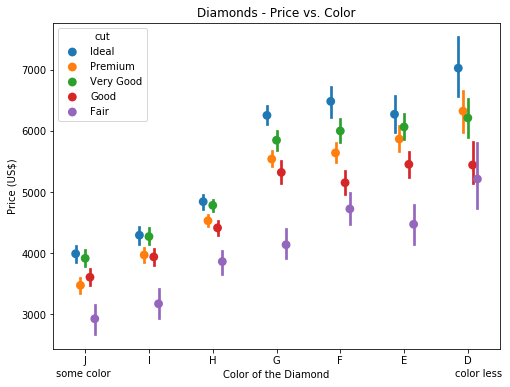

In [9]:
color_labels = [ 'J', 'I', 'H', 'G', 'F', 'E', 'D' ] # some-color .. color-less
cut_labels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

plt.figure(figsize = [8,6])

# NO, x-axis not continuous # ax = sb.scatterplot(data = diamonds_1c, x = 'color', y = 'price', hue = 'cut', hue_order=cut_labels[::-1])
ax = sb.pointplot(data = diamonds_1c, x = 'color', y = 'price', dodge=.3, linestyles='',
                  hue = 'cut', hue_order=cut_labels[::-1], palatte=sb.cubehelix_palette(8) )

plt.title("Diamonds - Price vs. Color")
plt.xlabel('Color of the Diamond')
plt.ylabel('Price (US$)')

# The dots are too tight when log scalled - skip this.
# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
# plt.yscale('log')
# plt.yticks([1000,3000, 5000, 8000, 10000, 15000], ['1 k', '3 k', '5 k', '8 k', '10 k', '15 k'])
# ax.set_yticklabels([], minor = True)
# plt.ylabel("Log of Price (US$)")

plt.annotate("some color", (.005,-.085), xycoords='axes fraction')
plt.annotate("color less", (0.90,-.085), xycoords='axes fraction')

plt.show();

Price vs. Color, Cut: Polishing comment 1: <span style="color:white"> Don't forget to provide an informative title and axis labels.</span>

Price vs. Color, Cut: Polishing comment 2: <span style="color:white"> There's a few things with the pointplot function that we can revise. First of all, the default color palette used is qualitative, but we should probably choose a sequential palette instead. We could also stand to add a dodge parameter so that the points aren't stacked directly on top of one another and to make individual points easier to read. One other possible modification we could add is to remove the line connecting points on each level of cut: with the other changes made, removing the connecting line can help reduce the ink used, cleaning up the presentation.</span>

> If you want to check your work on the case study against a reference, take a look at the example project in the project lesson! The example project is based on the same diamonds dataset, and all of the plots that you've worked on in this lesson are also covered there.